In [106]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Python/Statistics_for_Data_and_Business_Analysis/Statistics-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
from ipywidgets import Dropdown, interact
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import pointbiserialr
df = sns.load_dataset("titanic")
import statsmodels.api as sm
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go



In [108]:
import matplotlib.pyplot as plt


In [109]:


def check_df(dataframe, head=3):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Duplicate Values #####################")
    print(dataframe.duplicated().sum())

    print("##################### Types #####################")
    print(dataframe.dtypes)

    print("##################### Head #####################")
    print(dataframe.head(head))

    print("##################### NA #####################")
    print(dataframe.isna().mean()*100)

    print("##################### Unique Values #####################")
    print(dataframe.nunique())



In [110]:
check_df(df)

##################### Shape #####################
(891, 15)
##################### Duplicate Values #####################
107
##################### Types #####################
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
##################### Head #####################
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    n

In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Categorical Variables Analysis

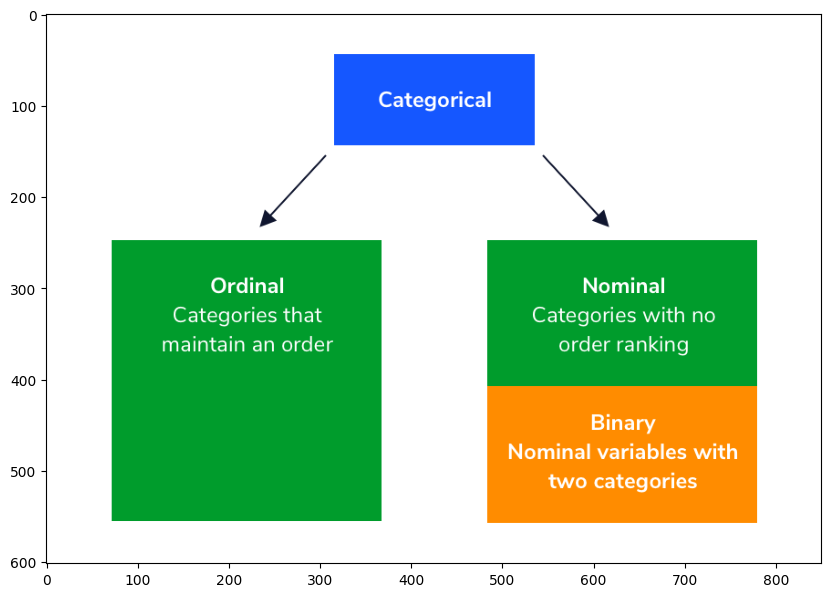

In [112]:

import matplotlib.image as mpimg
image = mpimg.imread('graphs/Intro_to_variable_types_3.webp')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

# **Kateqorik Dəyişənlər**  
## **Nominal Dəyişənlər**  
- İki və ya daha çox kateqoriyası olan, lakin daxili sıralaması olmayan dəyişənlərdir.  
- Məsələn, cinsiyyət, milliyyət və ya məhsulun markası nominal dəyişənlərdir.  

## **Ordinal Dəyişənlər**  
- Aydın bir sıralaması olan kateqorik dəyişənlərdir.  
- Məsələn, müştəri məmnuniyyəti reytinqi: "Çox Narazı", "Narazı", "Neytral", "Razı", "Çox Razı".  

---

# **Categorical Variables**  
## **Nominal Variables**  
- Variables with two or more categories but no intrinsic order.  
- Examples: gender, nationality, or product brand.  

## **Ordinal Variables**  
- Categorical variables with a clear order.  
- Example: customer satisfaction ratings – "Very Unsatisfied," "Unsatisfied," "Neutral," "Satisfied," "Very Satisfied."  


In [113]:
# Count the number of occurrences of each unique value in the "survived" column.
df["survived"].value_counts()


,count
survived,
0,549
1,342


In [114]:
# Get the unique values from the "sex" column.
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [115]:
# Count the number of unique values in the "class" column.
df["class"].nunique()


3

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [117]:
categorical_types = ["category", "object", "bool"]
categorical_columns = [col for col in df.columns if str(df[col].dtypes) in categorical_types]
categorical_columns

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [118]:
def find_categorical_columns(df, max_unique_values=10, include_mixed_types=True):
    categorical_cols = []
    for col in df.columns:
        dtype = str(df[col].dtypes)
        if dtype in ["category", "object", "bool"]:
            categorical_cols.append(col)
        elif include_mixed_types and pd.api.types.is_object_dtype(df[col]):
            categorical_cols.append(col)
        else:
            num_unique_values = df[col].nunique(dropna=False)
            if num_unique_values <= max_unique_values:
                categorical_cols.append(col)

    return categorical_cols

categorical_columns = find_categorical_columns(df)

In [119]:
categorical_columns

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [120]:
df[categorical_columns].head()

,survived,pclass,sex,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1,0,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,1,0,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0,0,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,1,0,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0,0,S,Third,man,True,NaN,Southampton,no,True


In [121]:
def plot_categorical_data(df, x, y, hue=None, kind='bar'):
    """
    Plots categorical data using seaborn's catplot function.

    Parameters:
    df (DataFrame): The DataFrame containing the data to plot.
    x (str): The name of the column to be plotted on the x-axis.
    y (str): The name of the column to be plotted on the y-axis.
    hue (str, optional): The name of the column to be used for color encoding. Defaults to None.
    kind (str, optional): The kind of plot to draw. Defaults to 'bar'.

    Returns:
    A seaborn axis-level plot object.
    """
    plot = sns.catplot(data=df, x=x, y=y, hue=hue, kind=kind)
    return plot

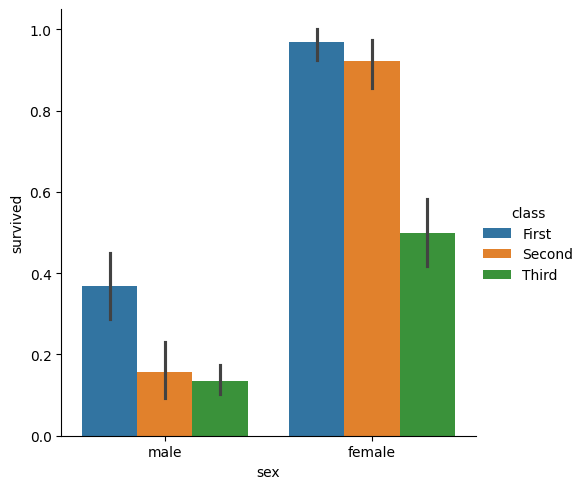

In [122]:
plot_categorical_data(df, x="sex", y="survived", hue="class", kind="bar") ;

<div class="alert alert-warning">
    
### English
For males in the "First" class category, the error bar extends quite a bit above and below the bar, indicating that there's more uncertainty about the true survival rate for this group. This could be due to a smaller sample size or greater variability in survival outcomes within this group.
For females, the error bars are relatively shorter, especially for the "First" class, suggesting that the survival rate data for this group is less variable and the mean survival rate is estimated with more certainty.


### **Azərbaycan dili**  
Kişilər üçün "Birinci" sinif kateqoriyasında xəta çubuğu çubuğun üstündən və altından xeyli uzanır. Bu, bu qrup üçün həqiqi sağ qalma nisbəti ilə bağlı daha çox qeyri-müəyyənlik olduğunu göstərir. Bunun səbəbi daha kiçik bir nümunə ölçüsü və ya bu qrupda sağ qalma nəticələrinin daha çox dəyişkən olması ola bilər.  

Qadınlar üçün isə xüsusilə "Birinci" sinifdə xəta çubuqları nisbətən qısadır. Bu, bu qrup üçün sağ qalma nisbəti məlumatlarının daha az dəyişkən olduğunu və orta sağ qalma nisbətinin daha dəqiq hesablandığını göstərir.  


</div>


In [123]:
def find_binary_columns(df, max_unique_values=2):
    binary_cols = []
    for col in df.columns:
        num_unique_values = df[col].nunique(dropna=False)
        if num_unique_values <= max_unique_values:
            binary_cols.append(col)
    return binary_cols

In [124]:
binary_columns=find_binary_columns(df)
binary_columns

['survived', 'sex', 'adult_male', 'alive', 'alone']

In [125]:
categorical_columns_set = set(df[categorical_columns].columns)
binary_value_set = set(binary_columns)
non_binary_columns = list(categorical_columns_set - binary_value_set)
non_binary_columns

['pclass', 'class', 'embark_town', 'parch', 'deck', 'embarked', 'who', 'sibsp']

## Numerical Variables Analysis

In [126]:
numerical_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
numerical_columns = [col for col in numerical_columns if col not in categorical_columns]


In [127]:
df[numerical_columns].head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [128]:
def describe_numerical_column(dataframe, column):
    """Provides a summary for a numerical column."""
    print(f"Summary for {column}:")
    display(dataframe[column].describe())

    missing = dataframe[column].isnull().sum()
    print(f"Missing values: {missing}")

    skewness = dataframe[column].skew()
    print(f"Skewness: {skewness:.2f}")

In [129]:
describe_numerical_column(df, 'age')

Summary for age:


,age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


Missing values: 177
Skewness: 0.39


In [130]:
def plot_numerical_column(dataframe, column):
    """Generates histogram and boxplot for a numerical column."""
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(dataframe[column], kde=True)
    plt.title(f"Histogram of {column}")

    plt.subplot(1, 2, 2)
    sns.boxplot(y=dataframe[column])
    plt.title(f"Boxplot of {column}")

    plt.tight_layout()
    plt.show()

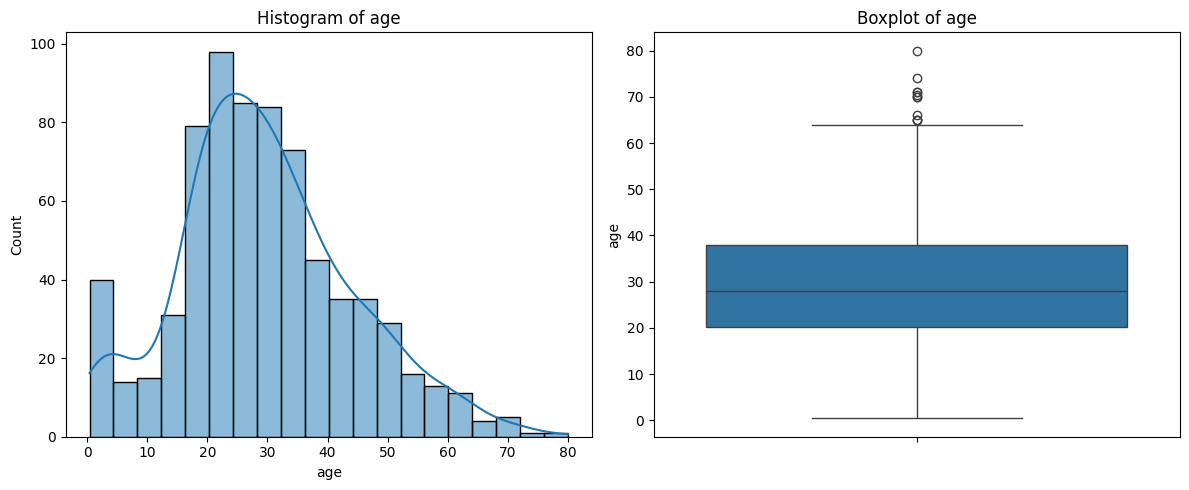

In [131]:
plot_numerical_column(df, 'age')

Chekc the continues varaible to see wheather is normally distributed or not . This is very imporatn to choose correct Correlation method.

In [132]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [133]:
df.dropna(inplace=True)

In [134]:
##df.drop('deck', axis=1, inplace= True)
##df.dropna(inplace=True)

# Correlation analysis

### English:
- Pearson Correlation Coefficient: Pearson's correlation measures the linear relationship between two continuous variables. It assumes that both variables are normally distributed and have a linear relationship.
- Kendall Tau Correlation Coefficient: Kendall's tau is a non-parametric measure that assesses the ordinal association between two variables. (which is suitable for ordinal data, as well as for continuous data that do not meet the assumptions of normality required for Pearson's correlation)
- Spearman Rank Correlation: Spearman's correlation is another non-parametric measure (Not normal disttibution). It does not assume normal distribution.
- Spearman's Rank correlation coefficient is indeed suitable for both ordinal datasets and non-parametric continuous values. It is a non-parametric measure that assesses the strength and direction of association between two variables. ( it is the similar with pearson correlation )
-  Kendall's Tau is particularly useful for small sample sizes because it is less affected by the distribution of data
- Spearman's correlation is suitable for larger datasets compared to Kendall's Tau and is a bit more straightforward to interpret and calculate.

### **Azərbaycan dili**  
- **Pearson Korelyasiya Əmsalı**: Pearsonun korelyasiyası iki davamlı dəyişən arasındakı xətti əlaqəni ölçür. Hər iki dəyişənin normal paylanmaya malik olduğunu və xətti əlaqəyə sahib olduğunu fərz edir.  

- **Kendall Tau Korelyasiya Əmsalı**: Kendallın tau əmsalı, iki dəyişən arasındakı ordinal assosiasiyanı qiymətləndirən parametrik olmayan bir ölçüdür. (Ordinal məlumatlar üçün uyğundur, həmçinin normal paylanma tələb edən Pearsonun korelyasiya şərtlərinə cavab verməyən davamlı məlumatlar üçün də istifadə edilə bilər.)  

- **Spearman Rütbə Korelyasiyası**: Spearmanın korelyasiyası başqa bir parametrik olmayan ölçüdür (Normal paylanma tələb etmir). O, dəyişənlərin normal paylanmasını fərz etmir.  

- **Spearman Rütbə Korelyasiya Əmsalı** həm ordinal məlumat dəstləri, həm də parametrik olmayan davamlı dəyərlər üçün uyğundur. Bu, iki dəyişən arasındakı əlaqənin gücünü və istiqamətini qiymətləndirən parametrik olmayan bir ölçüdür. (Pearson korelyasiyasına bənzəyir.)  

- **Kendall Tau** xüsusilə kiçik nümunə ölçüləri üçün faydalıdır, çünki o, məlumatların paylanmasından daha az təsirlənir.  

- **Spearman korelyasiyası** Kendall Tau ilə müqayisədə daha böyük məlumat dəstləri üçün uyğundur və şərhi, həmçinin hesablanması bir qədər daha sadədir.  




In [135]:
method : {'pearson', 'kendall', 'spearman'}

#df.corr(method='pearson')

## Correlation in non_binary_columns variables

In [136]:
non_binary_columns

['pclass', 'class', 'embark_town', 'parch', 'deck', 'embarked', 'who', 'sibsp']

In [137]:
df[non_binary_columns].head()

,pclass,class,embark_town,parch,deck,embarked,who,sibsp
1,1,First,Cherbourg,0,C,C,woman,1
3,1,First,Southampton,0,C,S,woman,1
6,1,First,Southampton,0,E,S,man,0
10,3,Third,Southampton,1,G,S,child,1
11,1,First,Southampton,0,C,S,woman,0


In [138]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    """Calculate Cramér's V statistic for two categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((rcorr-1), (kcorr-1)))



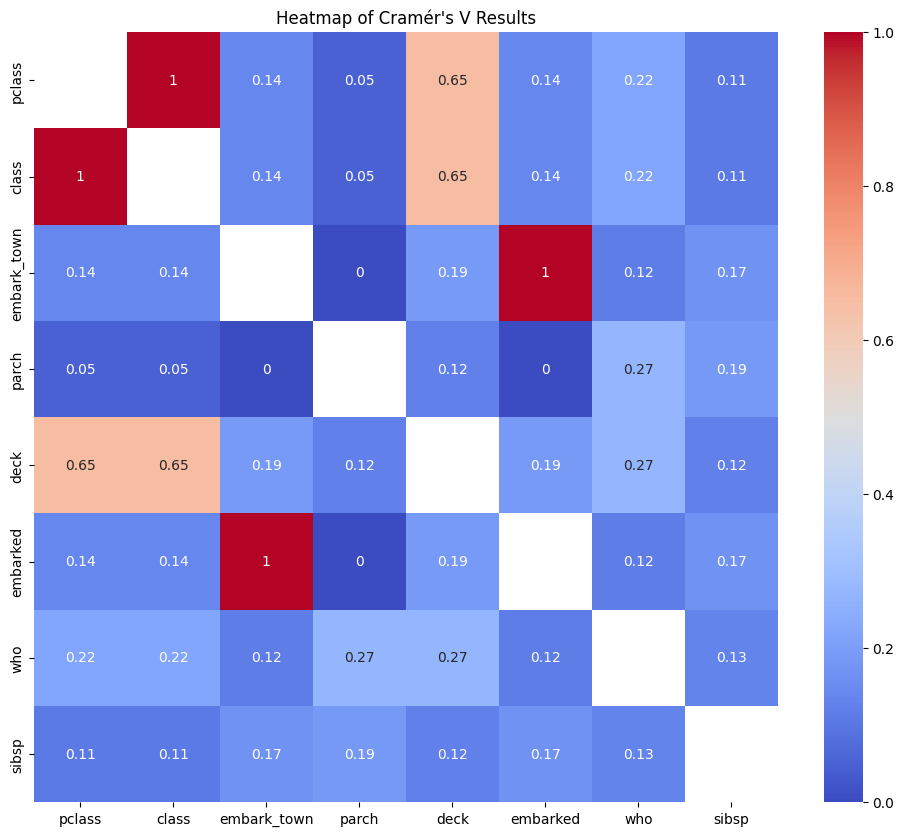

In [139]:
cramers_v_results = pd.DataFrame(index=non_binary_columns, columns=non_binary_columns)
for col1 in non_binary_columns:
    for col2 in non_binary_columns:
        if col1 != col2:
            cramers_v_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_v_results
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_results.astype(float), annot=True, cmap='coolwarm')
plt.title("Heatmap of Cramér's V Results")
plt.show()

## Correlation in continuous variables and  binary columns

### Eng:
- First, before finding the correlation, we need to convert categorical ( binary) columns to numerical values.
### Aze:
- Əvvəlcə, korelyasiyanı tapmazdan əvvəl, kateqorik (ikili) sütunları ədədi dəyərlərə çevirməliyik.  


In [140]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


In [141]:
for i in df[binary_columns]:
    df[i] = le.fit_transform(df[i])

In [142]:
df[binary_columns].head()

,survived,sex,adult_male,alive,alone
1,1,0,0,1,0
3,1,0,0,1,0
6,0,1,1,0,1
10,1,0,0,1,0
11,1,0,0,1,1


In [143]:
numerical_columns

['age', 'fare']

In [144]:
ordinal_columns=['pclass' , 'sibsp']

### Eng:
As "pclass" and "sibsp" can be considered as ordinal categorical datasets, we can use Spearman correlation for those columns.
### Aze:

"Pclass" və "sibsp" ordinal kateqorik məlumat dəstləri kimi qəbul edilə bilər, buna görə bu sütunlar üçün Spearman korelyasiyasından istifadə edə bilərik.  



In [145]:
method : {'pearson', 'kendall', 'spearman'}
#df.corr(method='pearson')

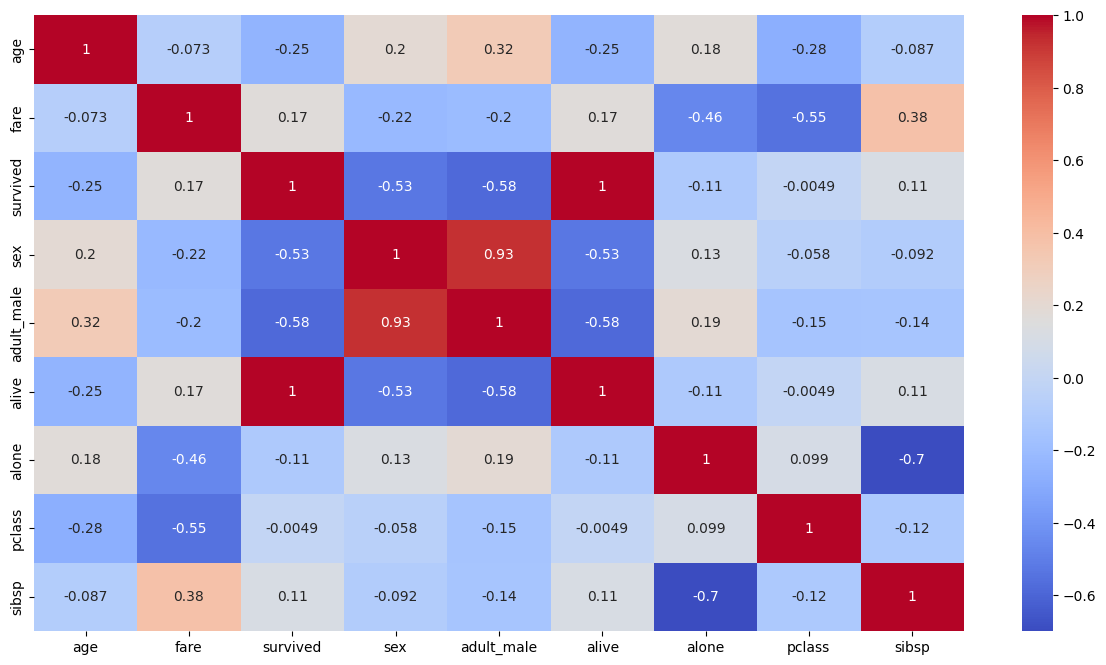

In [146]:
plt.figure(figsize=(15, 8))
correlation_matrix = df[numerical_columns+binary_columns +ordinal_columns] .corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


# Correlation analysis  with Visualizing

 ### Visualizing the relationship between a categorical variable and  numerical columns

In [147]:

numerical_columns_sorted = sorted(numerical_columns)
categorical_columns_sorted = sorted(categorical_columns)
numerical_dropdown = Dropdown(options=numerical_columns_sorted, description='Numerical Column:')
categorical_dropdown = Dropdown(options=categorical_columns_sorted, description='Categorical Column:')


In [148]:

def update_plot(numerical_column, categorical_column):
    data = []
    categories = df[categorical_column].unique().tolist()
    if pd.isna(categories).any():
        categories.append(np.nan)
    for category in categories:
        if pd.isna(category):
            category_name = 'missing'
            subset = df[pd.isna(df[categorical_column])][numerical_column]
        else:
            category_name = str(category)
            subset = df[df[categorical_column] == category][numerical_column]

        data.append(
            go.Box(
                y=subset,
                name=category_name
            )
        )
    fig = go.Figure(data=data)
    fig.update_layout(title=f'Distribution of {numerical_column} by {categorical_column} (including Missing)')
    fig.show(renderer="colab")
    plt.savefig('plot.png')

interact(update_plot, numerical_column=numerical_dropdown, categorical_column=categorical_dropdown)


interactive(children=(Dropdown(description='Numerical Column:', options=('age', 'fare'), value='age'), Dropdow…

<function __main__.update_plot(numerical_column, categorical_column)>

 ### Visualization for Two Numerical Columns:

In [149]:


numerical_columns_sorted = sorted(numerical_columns)
def update_numerical_plot(x_column, y_column):
    fig = make_subplots(rows=2, cols=2,
                        column_widths=[0.90, 0.15],
                        row_heights=[0.15, 0.85],
                        shared_xaxes=True,
                        shared_yaxes=True,
                        vertical_spacing=0.02,
                        horizontal_spacing=0.02,
                        subplot_titles=(None, None, f'Scatter Plot of {x_column} vs {y_column}'))

    fig.add_trace(go.Scatter(x=df[x_column], y=df[y_column], mode='markers', name='scatter'), row=2, col=1)
    fig.add_trace(go.Histogram(x=df[x_column], name=f'Histogram {x_column}'), row=1, col=1)
    fig.add_trace(go.Histogram(y=df[y_column], name=f'Histogram {y_column}', orientation='h'), row=2, col=2)

    fig.update_layout(height=800, width=1200, showlegend=False)
    fig.show()



x_dropdown = Dropdown(options=numerical_columns_sorted, description='X-axis:')
y_dropdown = Dropdown(options=numerical_columns_sorted, description='Y-axis:')

interact(update_numerical_plot, x_column=x_dropdown, y_column=y_dropdown)


interactive(children=(Dropdown(description='X-axis:', options=('age', 'fare'), value='age'), Dropdown(descript…

<function __main__.update_numerical_plot(x_column, y_column)>

### Visualization for Two Categorical Columns:


In [150]:




# Assuming df is your DataFrame and categorical_columns is a list of column names.

def update_categorical_plot(column1, column2):
    if column1 == column2:
        print("The same column is selected for both axes. Please select different columns.")
        return
    grouped_data = df.groupby([column1, column2]).size().reset_index(name='counts')
    data = []
    categories = sorted(df[column2].unique())
    for category in categories:
        data.append(
            go.Bar(
                name=str(category),
                x=grouped_data[grouped_data[column2] == category][column1],
                y=grouped_data[grouped_data[column2] == category]['counts']
            )
        )
    fig = go.Figure(data=data)
    fig.update_layout(
        barmode='group',
        title=f'Grouped Bar Chart of {column1} and {column2}',
        xaxis_title=column1,
        yaxis_title='Count',
        xaxis={'categoryorder':'total descending'}  # This will order the x-axis based on count
    )
    fig.show()

# Example usage:
categorical_columns_sorted = sorted(categorical_columns)  # Ensure categorical_columns is defined
column1_dropdown = Dropdown(options=categorical_columns_sorted, description='Column 1:')
column2_dropdown = Dropdown(options=categorical_columns_sorted, description='Column 2:')
interact(update_categorical_plot, column1=column1_dropdown, column2=column2_dropdown)



interactive(children=(Dropdown(description='Column 1:', options=('adult_male', 'alive', 'alone', 'class', 'dec…

<function __main__.update_categorical_plot(column1, column2)>

In [151]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,0,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,1,0
3,1,1,0,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,1,0
6,0,1,1,54.0,0,0,51.8625,S,First,man,1,E,Southampton,0,1
10,1,3,0,4.0,1,1,16.7000,S,Third,child,0,G,Southampton,1,0
11,1,1,0,58.0,0,0,26.5500,S,First,woman,0,C,Southampton,1,1


In [152]:
df.groupby('class')['alone'].count()

<ipython-input-152-b5edeabcc0a2>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,alone
class,
First,157
Second,15
Third,10
